
Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths




,TIME_PERIOD,REF_AREA,MEASURE,obsValue
,<chr>,<chr>,<chr>,<dbl>
1,1995-08,NLD,BCICP,100.5092
2,1995-09,NLD,BCICP,100.4725
3,2016-07,NLD,BCICP,100.9249
4,2018-07,NLD,BCICP,101.3257
5,2018-08,NLD,BCICP,101.2638
6,2016-02,NLD,BCICP,100.6983


TIME_PERIOD,BCICP_NLD_CLI,CCICP_NLD_CLI
<date>,<dbl>,<dbl>
2024-06-01,100.2941,99.37430
2024-07-01,100.2873,99.46568
2024-08-01,100.2793,99.57961
2024-09-01,100.2380,99.63214
2024-10-01,100.1926,99.47102
2024-11-01,100.2126,99.23434


TIME_PERIOD,CCICP_DEU,BCICP_DEU
<date>,<dbl>,<dbl>
2024-06-01,99.70036,98.75754
2024-07-01,99.78452,98.63038
2024-08-01,99.73986,98.45155
2024-09-01,99.68084,98.27512
2024-10-01,99.67892,98.17282
2024-11-01,99.59075,98.12927


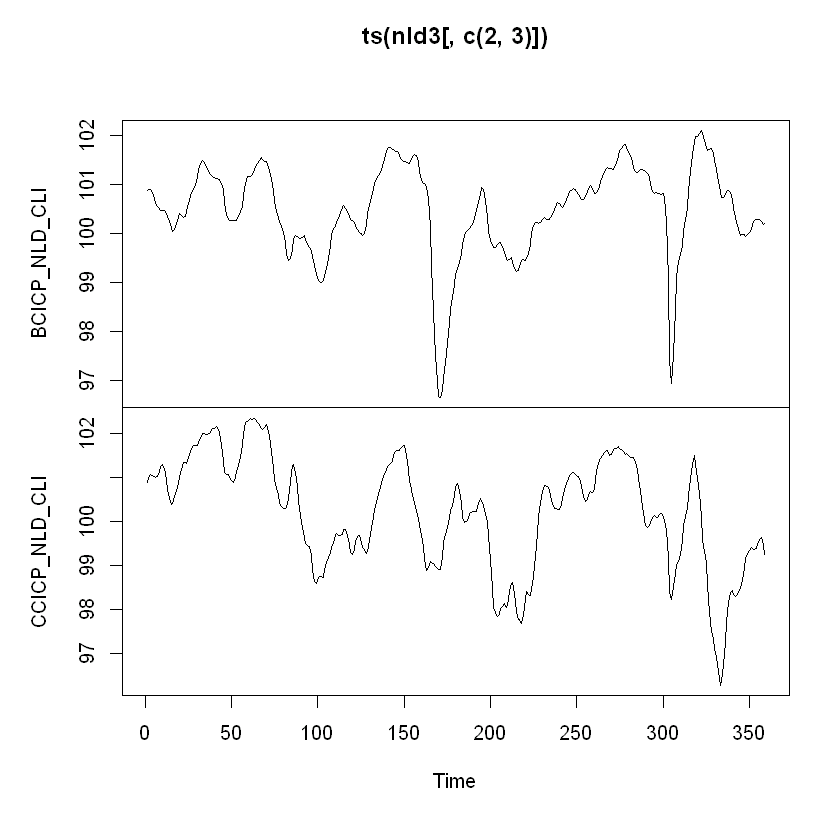

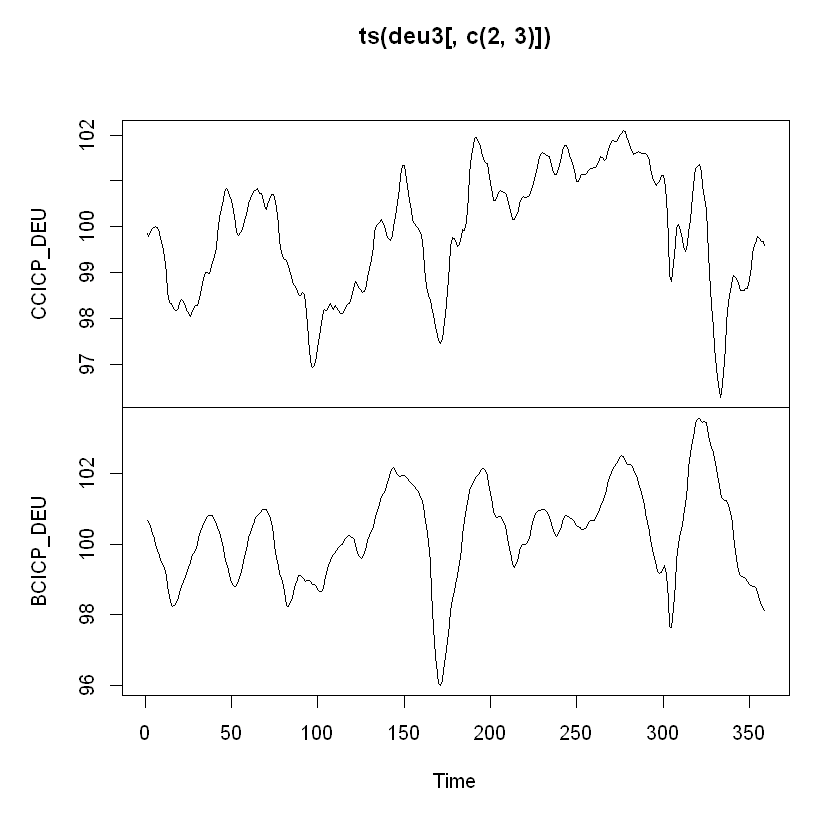

In [1]:
library(reshape2)
library(rsdmx)
library(tidyr)

output <- "../output_mo_qt/"
myUrl <- "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_CLI,4.1/NLD.M.LOCOS3+LOCOPC+CCICP+BCICP......H?startPeriod=1995-01&dimensionAtObservation=AllDimensions"

dataset <- readSDMX(myUrl)
stats <- as.data.frame(dataset)


#write.csv(stats,"output/LeadingIndicators_NLD_m0.csv", row.names = FALSE)

#stats[order(stats$TIME_PERIOD),]
nld1 <- stats[c("TIME_PERIOD", "REF_AREA", "MEASURE","obsValue")]

head(nld1)

nld2 <- pivot_wider(nld1, names_from=MEASURE, values_from=obsValue)

nld2$TIME_PERIOD <- as.Date(paste0(nld2$TIME_PERIOD, "-01"), format = "%Y-%m-%d")

nld3 <- nld2[order(nld2$TIME_PERIOD),]
nld3$REF_AREA <- NULL

names(nld3)[c(2,3)] <- paste0(names(nld3)[c(2,3)], "_NLD_CLI")
tail(nld3)
plot(ts(nld3[,c(2,3)]))
myUrl <- "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_CLI,4.1/DEU.M.LOCOS3+LOCOPC+CCICP+BCICP......H?startPeriod=1995-01&dimensionAtObservation=AllDimensions"

dataset <- readSDMX(myUrl)
stats <- as.data.frame(dataset)
#stats[order(stats$TIME_PERIOD),]
deu1 <- stats[c("TIME_PERIOD", "REF_AREA", "MEASURE","obsValue")]

deu2 <- pivot_wider(deu1, names_from=MEASURE, values_from=obsValue)
deu2$LOCOS3 <- NULL


deu2$TIME_PERIOD <- as.Date(paste0(deu2$TIME_PERIOD, "-01"), format = "%Y-%m-%d")

deu3 <- deu2[order(deu2$TIME_PERIOD),]
deu3$REF_AREA <- NULL

names(deu3)[c(2,3)] <- paste0(names(deu3)[c(2,3)], "_DEU")
tail(deu3)
plot(ts(deu3[,c(2,3)]))
oecd_confidence <- merge(x = nld3, y = deu3, by = "TIME_PERIOD", all = TRUE)
write.csv(oecd_confidence, paste0(output, "OECD_Confidence_mo.csv"), row.names = FALSE)
